# Coupled Linear ODE (RK-4 Method)
<b>Computational Astrophysics - ESA614 / ESA414<b><br>
Shivam Kumaran<br>
SC17b122<br>


## Importing Libraries

In [1]:
from rk4 import rk4 
import numpy as np
from matplotlib import pyplot as plt 
plt.rcdefaults()
plt.style.use('seaborn-ticks')
#plt.style.use('dark_background')
plt.style.use('seaborn-dark-palette')
#plt.style.use('bmh')
plt.rcParams.update({'font.size': 12})

# RK4

In [2]:
def rk4_cp(x , x_0 , y_0 , z_0, fy , fz , tol=1e-5):

    def rk4_next_val(f,x_0 , y_0 , h):
        f0 = f(x_0,y_0)
        f1 = f(x_0+h/2 ,  y_0+(h/2)*f0)
        f2 = f(x_0+h/2 , y_0+(h/2)*f1)
        f3 = f(x_0+h , y_0+h*f2)
        y_next = y_0+(h/6)*(f0+2*f1+2*f2+f3)
        return y_next

    def calc(h):
        n = int(abs((x_0-x)/h))
        x_next,y_next ,z_next = x_0, y_0 , z_0
        for i in range(n):
            y_next = rk4_next_val(fy(z_next) , x_next , y_next , h)
            z_next = rk4_next_val(fz(y_next) , x_next , z_next , h)
            x_next += h              
        return y_next , z_next

    if(abs((x-x_0))<1e-14):
        return (y_0 , z_0)
    else:
        h = (x-x_0)/2
        prev = calc(h)
        h = h/2
        nxt = calc(h)
        err1 = abs((prev[0]-nxt[0])/(prev[0]))
        err2 = abs((prev[1]-nxt[1])/(prev[1]))
        i = 0

        while(err1>tol or err2>tol):
            i+=1
            h = h/2
            prev = nxt
            nxt = calc(h)
            err1 = abs((prev[0]-nxt[0])/(prev[0]))
            err2 = abs((prev[1]-nxt[1])/(prev[1]))
        return nxt

## Defining Constants
all in CGS Units

In [4]:
kb = 1.38e-16 #Boltzman's constant
me = 9.1e-28 # Mass of electron 
mp = 1.6e-24 #mass of proton
c = 2.99792458e10 # speed of light
rg = 3e6 # Swarchchild radius for M = 10 M_sun

## Defining Functions

### Coulomb Coupling $\Gamma_{ep}$

In [5]:
def gamma(n , tp, te ):
    val = (3.2e-12)*(kb/mp)*(n**2)*(tp-te)*(((me)/(te**3))**0.5)
    return val

### Bremsstrahlung cooling $\Lambda_e$

In [6]:
def lmd(n,te):
    val = (1.4e-27)*(n**2)*(te**0.5)
    return val

### Number Density

In [7]:
def nx(m_dot ,  x):
    denom = 2*np.pi*mp*(rg**2)*c*(x**(3/2))
    val = m_dot/denom
    return val

### Derivative of $T_p$ w.r.t $x$ 
>$\frac{dT_p}{dx}$

In [8]:
def f_tp_wrap(m_dot):
    def f_tp(te):
        def f_in(x, tp):
            n = nx(m_dot,x)
            g = gamma(n , tp , te)
            term1 = ((4*np.pi*mp*rg**3)/(3*kb*m_dot))*g*(x**2)
            term2 = tp*((3*x-4)/(3*x*(x-1)))
            #print(term1,term2)
            val = term1 - term2
            return val
        return f_in
    return f_tp

### Derivative of $T_e$ w.r.t $x$
> $\frac{dT_e}{dx}$

In [9]:
def f_te_wrap(m_dot):
    def f_te(tp):
        def f_in(x, te):
            #print(te)
            n = nx(m_dot,x)
            g = gamma(n , tp , te)
            l = lmd(n,te)
            term1 = ((4*np.pi*mp*rg**3)/(3*kb*m_dot))*(g-l)*(x**2)
            term2 = te*((3*x-4)/(3*x*(x-1)))
            #print(term1 , term2)
            val = -term2 -term1
            return val
        return f_in
    return f_te


## Problem (c)
Initial Conditions
> $x_0 = 10^3$ <br> , 
$Te_0 = 10^8 K$ <br> , 
$Tp_0 = 10^8 K$ <br> , 
$\dot m = 10^{17} gm/cc$

In [10]:
te_0 = 1e8 
tp_0 = 1e8 
x_0 = 1e3 
m_dot_0 = 1e17
x_range = np.linspace(2,1e3 , 100)
t_q1 = []
for x in x_range:
    temp = rk4_cp(float(x),x_0,te_0,tp_0,f_tp_wrap(m_dot_0),f_te_wrap(m_dot_0) , tol=1e-5)
    print('x:{:.2f} ,  T_p: {:.2f} , T_e : {:.2f}'.format(x,temp[0],temp[1]))
    t_q1.append(list(temp))
#data = rk4_cp(x , x_0 , te_0 , tp_0 , f_tp_wrap(m_dot_0) , f_te_wrap(m_dot_0))

x:2.00 ,  T_p: 39693279993.54 , T_e : 39513453316.68
x:12.08 ,  T_p: 8044271128.46 , T_e : 8010524490.09
x:22.16 ,  T_p: 4444324764.43 , T_e : 4426540395.23
x:32.24 ,  T_p: 3069752199.03 , T_e : 3057932335.87
x:42.32 ,  T_p: 2344510951.94 , T_e : 2335783869.21
x:52.40 ,  T_p: 1896440872.94 , T_e : 1889595909.94
x:62.48 ,  T_p: 1592148827.60 , T_e : 1586564701.83
x:72.57 ,  T_p: 1372001729.73 , T_e : 1367318351.68
x:82.65 ,  T_p: 1205337702.33 , T_e : 1201328234.15
x:92.73 ,  T_p: 1074778305.91 , T_e : 1071290891.91
x:102.81 ,  T_p: 969738270.10 , T_e : 966666420.64
x:112.89 ,  T_p: 883401765.74 , T_e : 880668017.71
x:122.97 ,  T_p: 811177782.24 , T_e : 808731943.25
x:133.05 ,  T_p: 749874119.68 , T_e : 747662925.08
x:143.13 ,  T_p: 697185388.81 , T_e : 695174020.86
x:153.21 ,  T_p: 651414857.93 , T_e : 649575537.13
x:163.29 ,  T_p: 611283908.94 , T_e : 609594132.30
x:173.37 ,  T_p: 575810721.22 , T_e : 574252017.19
x:183.45 ,  T_p: 544228878.38 , T_e : 542785907.06
x:193.54 ,  T_p: 515

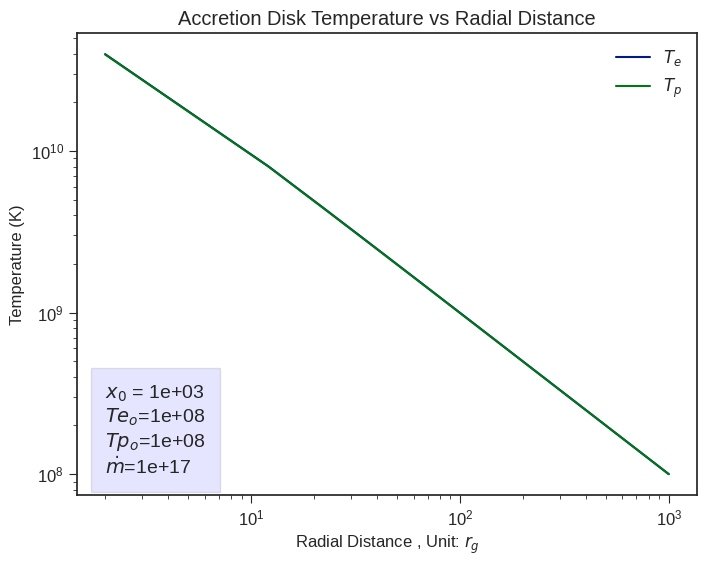

In [12]:
te_0 = 1e8 
tp_0 = 1e8 
x_0 = 1e3 
m_dot_0 = 1e17
t_q1 = np.asarray(t_q1)
te_q1 = t_q1[:,0]
tp_q1 = t_q1[:,1]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.loglog(x_range, te_q1)
ax.loglog(x_range,tp_q1)
ax.set_xlabel('Radial Distance , Unit: $r_g$')
ax.set_ylabel('Temperature (K)')
ax.set_title('Accretion Disk Temperature vs Radial Distance')
ax.text(2,1e8 , '$x_0$ = {:.0e}\n$Te_o$={:.0e}\n$Tp_o$={:.0e} \n$\dot m$={}'.format(x_0,te_0,tp_0,m_dot_0) , bbox = {'facecolor':'blue' , 'alpha':0.1, 'pad':10 } , fontsize = 14)
plt.legend(['$T_e$','$T_p$'])
plt.show()

## Problem (c)
Initial Conditions
> $x_0 = 10^3$ <br>
$Te_0 = 10^8 K$ <br>
$Tp_0 = 5\times 10^8 K$ <br>
$\dot m = 10^{17} gm/cc$

In [15]:
te_0 = 1e8 
tp_0 = 5e8 
x_0 = 1e3 
m_dot_0 = 1e17
x_range = np.linspace(2,1e3 , 100)
t_q2 = []
#print('X , $T_p$ , ')
for x in x_range:
    temp = rk4_cp(x,x_0,te_0,tp_0,f_tp_wrap(m_dot_0),f_te_wrap(m_dot_0) , tol = 1e-5)
    print('x:{:.2f} ,  T_p: {:.2f} , T_e : {:.2f}'.format(x,temp[0],temp[1]))
    t_q2.append(list(temp))
#data = rk4_cp(x , x_0 , te_0 , tp_0 , f_tp_wrap(m_dot_0) , f_te_wrap(m_dot_0))

x:2.00 ,  T_p: 41099734419.50 , T_e : 196666395274.85
x:12.08 ,  T_p: 8328943049.92 , T_e : 39863000296.28
x:22.16 ,  T_p: 4601299360.18 , T_e : 22025895685.00
x:32.24 ,  T_p: 3177897142.35 , T_e : 15214874197.91
x:42.32 ,  T_p: 2426858166.52 , T_e : 11621209999.66
x:52.40 ,  T_p: 1962825167.21 , T_e : 9400925318.68
x:62.48 ,  T_p: 1647673899.08 , T_e : 7893071862.37
x:72.57 ,  T_p: 1419655803.42 , T_e : 6802169602.41
x:82.65 ,  T_p: 1247021030.06 , T_e : 5976287837.92
x:92.73 ,  T_p: 1111774348.81 , T_e : 5329314722.80
x:102.81 ,  T_p: 1002954700.29 , T_e : 4808798637.84
x:112.89 ,  T_p: 913504217.56 , T_e : 4380965772.94
x:122.97 ,  T_p: 838672875.41 , T_e : 4023085985.44
x:133.05 ,  T_p: 775146481.67 , T_e : 3719300009.64
x:143.13 ,  T_p: 720542268.10 , T_e : 3458205718.77
x:153.21 ,  T_p: 673103160.01 , T_e : 3231395115.92
x:163.29 ,  T_p: 631505050.29 , T_e : 3032532082.66
x:173.37 ,  T_p: 594731175.65 , T_e : 2856751230.62
x:183.45 ,  T_p: 561987832.99 , T_e : 2700254578.04
x:193

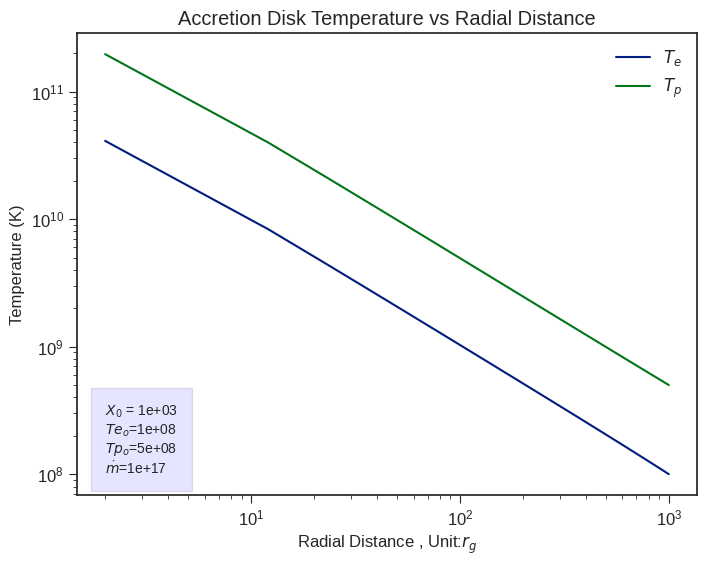

In [17]:
te_0 = 1e8 
tp_0 = 5e8 
x_0 = 1e3 
m_dot_0 = 1e17
t_q2 = np.asarray(t_q2)
te_q2 = t_q2[:,0]
tp_q2 = t_q2[:,1]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.loglog(x_range, te_q2)
ax.loglog(x_range,tp_q2)
ax.set_xlabel('Radial Distance , Unit:$r_g$')
ax.set_ylabel('Temperature (K)')
ax.set_title('Accretion Disk Temperature vs Radial Distance')
ax.text(2,1e8 , '$X_0$ = {:.0e}\n$Te_o$={:.0e}\n$Tp_o$={:.0e} \n$\dot m$={}'.format(x_0,te_0,tp_0,m_dot_0) , bbox = {'facecolor':'blue' , 'alpha':0.1, 'pad':10 } , fontsize = 10)
plt.legend(['$T_e$','$T_p$'])
plt.show()

## Problem (c)
Initial Conditions 

> $x_0 = 10^3$ <br>
 , $Te_0 = 10^8 K$ <br>
 , $Tp_0 = 10^8 K$ <br>
, $\dot m = 10^{19} gm/cc$

In [18]:
te_0 = 1e8 
tp_0 = 1e8 
x_0 = 1e3 
m_dot_0 = 1e19
x_range = np.linspace(2,1e3 , 100)
t_q3 = []

for x in x_range:
    temp = rk4_cp(float(x),x_0,te_0,tp_0,f_tp_wrap(m_dot_0),f_te_wrap(m_dot_0) , tol = 1e-5)
    print('x:{:.2f} ,  T_p: {:.2f} , T_e : {:.2f}'.format(x,temp[0],temp[1]))
    t_q3.append(list(temp))

#data = rk4_cp(2.0 , x_0 , te_0 , tp_0 , f_tp_wrap(m_dot_0) , f_te_wrap(m_dot_0) , tol=1e-2)
#print(data)

x:2.00 ,  T_p: 33046472980.86 , T_e : 28647794323.50
x:12.08 ,  T_p: 6713327149.33 , T_e : 6023213391.39
x:22.16 ,  T_p: 3719713250.06 , T_e : 3392917304.86
x:32.24 ,  T_p: 2577133572.48 , T_e : 2377134991.36
x:42.32 ,  T_p: 1974428603.27 , T_e : 1836505639.92
x:52.40 ,  T_p: 1602103190.55 , T_e : 1500043463.01
x:62.48 ,  T_p: 1349238440.90 , T_e : 1270100391.27
x:72.57 ,  T_p: 1166268721.16 , T_e : 1102810214.35
x:82.65 ,  T_p: 1027715467.87 , T_e : 975522967.10
x:92.73 ,  T_p: 919141596.64 , T_e : 875352028.36
x:102.81 ,  T_p: 831755388.12 , T_e : 794420430.20
x:112.89 ,  T_p: 759896994.49 , T_e : 727639581.56
x:122.97 ,  T_p: 699754829.53 , T_e : 671577539.77
x:133.05 ,  T_p: 648678772.55 , T_e : 623823763.19
x:143.13 ,  T_p: 604755295.57 , T_e : 582649117.35
x:153.21 ,  T_p: 566576199.11 , T_e : 546772467.23
x:163.29 ,  T_p: 533080374.48 , T_e : 515225998.45
x:173.37 ,  T_p: 503453063.02 , T_e : 487264800.82
x:183.45 ,  T_p: 477058277.36 , T_e : 462306084.09
x:193.54 ,  T_p: 453392

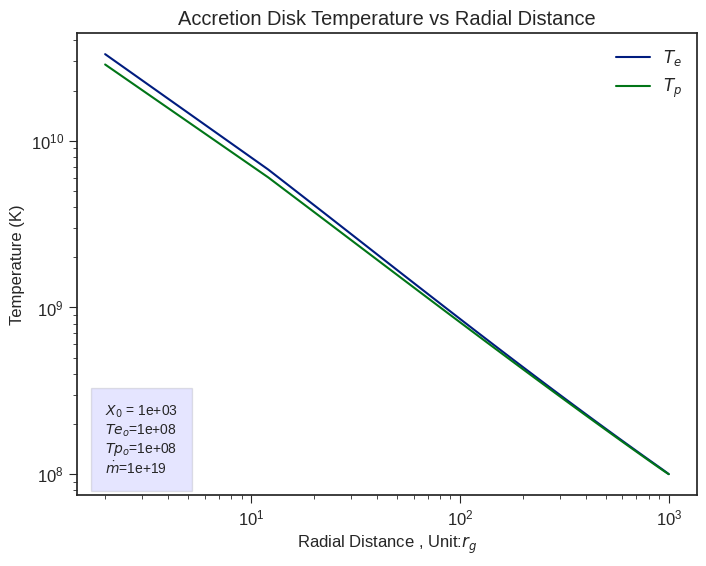

In [19]:
t_q3 = np.asarray(t_q3)
te_q3 = t_q3[:,0]
tp_q3 = t_q3[:,1]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.loglog(x_range, te_q3)
ax.loglog(x_range,tp_q3)
ax.set_xlabel('Radial Distance , Unit:$r_g$')
ax.set_ylabel('Temperature (K)')
ax.set_title('Accretion Disk Temperature vs Radial Distance')
ax.text(2,1e8 , '$X_0$ = {:.0e}\n$Te_o$={:.0e}\n$Tp_o$={:.0e} \n$\dot m$={}'.format(x_0,te_0,tp_0,m_dot_0) , bbox = {'facecolor':'blue' , 'alpha':0.1, 'pad':10 } , fontsize = 10)
plt.legend(['$T_e$','$T_p$'])
plt.show()